In [2]:
from AdventUtils import *

starting import


# Day 1

In [2]:
input = parse(1, int)
def increases(input: Sequence[int]=input):
    counter = 0
    start = input[0]
    for num in input[1:]:
        if(num > start):
            counter += 1
        start = num
    return counter

def increases_improved(input: Sequence[int]=input):
    return quantify(input[i] > input[i-1] for i in range(1, len(input)))

answer(1.1, 1482, lambda: increases_improved(input))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 2000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
148
167
168
169
182
188
193
209
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 2000 ints:
────────────────────────────────────────────────────────────────────────────────────────────────────
148
167
168
169
182
188
193
209
...


  .0010 seconds, answer: 1,400 !!!! INCORRECT !!!! Expected 1,482

In [4]:
def increases2(input: str = input):
    
    prev = sum(input[0:3])
    counter = 0
    for i in range(1, len(input)-2):
        cur = sum(input[i:i+3])
        if(cur > prev):
            counter += 1
        prev = cur
    return counter
    
def q(iterable, pred=bool):
    return sum(1 for item in iterable if pred(item))

def increases2_improved(input):
    return q(sum(input[i:i+3]) < sum(input[i+1:i+4]) for i in range(0,len(input)-3))
    
def windows(sequence, width):
    return [sum(sequence[i:i+width]) for i in range(0, len(sequence)-width+1)]

answer(1.2, 1518, lambda: increases_improved(windows(input,3)))


  .0010 seconds, answer: 1,429 !!!! INCORRECT !!!! Expected 1,518

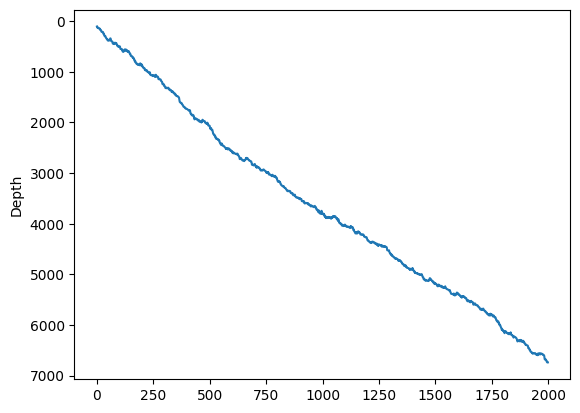

In [5]:
plt.plot(input)
plt.ylabel('Depth')
plt.gca().invert_yaxis()

# Day 2

In [322]:
input2 = parse(2, atoms)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
forward 4
down 9
forward 6
down 5
up 2
forward 5
forward 7
up 5
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜ 1000 tuples:
────────────────────────────────────────────────────────────────────────────────────────────────────
('forward', 4)
('down', 9)
('forward', 6)
('down', 5)
('up', 2)
('forward', 5)
('forward', 7)
('up', 5)
...


In [323]:
def getposition(input: Sequence[atoms]):
    x = 0
    y = 0
    for op, val in input:
        if op == 'forward': x += val
        elif op == 'down': y += val
        elif op == 'up': y -= val
            
    print(f"{x}, {y}")
    print(x * y)
    return(x * y)

answer(2.1, 1727835, lambda: getposition(input2))

1905, 907
1727835


  .0013 seconds, answer: 1,727,835

In [324]:
def getposition2(input: Sequence[atoms]):
    x = y = aim = 0
    for op, val in input:
        if op == 'forward': 
            x += val
            y += aim * val
        elif op == 'down': aim += val
        elif op == 'up': aim -= val
            
    print(f"{x}, {y}")
    print(x * y)
    return(x * y)

answer(2.2, 1544000595, lambda: getposition2(input2))


1905, 810499
1544000595


  .0012 seconds, answer: 1,544,000,595

# Day 3

In [325]:
in3 = parse(3, str)

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 1000 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
110001010110
011101111101
111011110101
011110101000
100100011001
011001001110
101011000101
110000111111
...


In [326]:
import math
def arr_to_dec(bin_arr):
    total = 0
    for i, d in enumerate(bin_arr[::-1]):
        total += int(math.pow(2,i)) * d
    return total
          
def power(input: Sequence[str]):

    result = [0] * (len(input[0]))
    for bin in input:
        for i, c in enumerate(bin):
            result[i] += int(c)
            
    gamma_bin = [int(n > (len(input) / 2)) for n in result]
    epsilon_bin = [int(n < (len(input) / 2)) for n in result]
    gamma = arr_to_dec(gamma_bin)
    epsilon = arr_to_dec(epsilon_bin)
    return gamma * epsilon
    

def power2(input: Sequence[str]):
    def common(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') > col.count('0') else '0'
    def uncommon(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') < col.count('0') else '0'
        
    gamma = epsilon = '' 
    for i, s in enumerate(input[0]):
        gamma += common(input, i)
        epsilon += uncommon(input, i)

    return int(gamma,2) * int(epsilon,2)


print(answer(3.1, 2035764, lambda: power(in3)))
print(answer(3.1, 2035764, lambda: power2(in3)))


  .0056 seconds, answer: 2,035,764
  .0033 seconds, answer: 2,035,764


In [327]:
def life_support(input: Sequence[str]):
    def common(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') >= col.count('0') else '0'

    def uncommon(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') < col.count('0') else '0'
        
    def get_oxygen(diags):
        filterbit = common(diags, 0)
        filtered = [diag for diag in diags if diag[0] == filterbit]
        for i in range(1, len(diags[0])):
            filterbit = common(filtered, i)
            filtered = [diag for diag in filtered if diag[i] == filterbit]
            if len(filtered) == 1: 
                return filtered[0]
        if not filtered:
            raise Exception("")

    def get_co2(diags):
        filterbit = uncommon(diags, 0)
        filtered = [diag for diag in diags if diag[0] == filterbit]
        for i in range(1, len(diags[0])):
            filterbit = uncommon(filtered, i)
            filtered = [diag for diag in filtered if diag[i] == filterbit]
            if len(filtered) == 1: 
                return filtered[0]
        if not filtered:
            raise Exception("")

    oxygen = get_oxygen(input)
    co2 = get_co2(input)
    print(oxygen)
    print(co2)
    return int(oxygen,2) * int(co2,2)


def life_support2(input: Sequence[str]):
    def common(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') >= col.count('0') else '0'

    def uncommon(diags, i):
        col = [diag[i] for diag in diags]
        return '1' if col.count('1') < col.count('0') else '0'
        
    def filter(diags, common_fn, i):
        if len(diags) == 1:
            return diags[0]
        else:
            bit = common_fn(diags, i)
            filtered = [diag for diag in diags if diag[i] == bit]
            return filter(filtered, common_fn, i+1)
            
    return int(filter(input, common, 0), 2) * int(filter(input, uncommon, 0), 2)
    
#answer(3.2, 2817661, lambda: life_support(in3))
answer(3.2, 2817661, lambda: life_support2(in3))

  .0133 seconds, answer: 2,817,661

# Day 4

In [328]:
from itertools import *
from tabulate import tabulate

class Board():
    def __init__(self, grid=()):
        self.winner = False
        self.called = {(x,y): False
                     for y, row in enumerate(grid)
                     for x, val in enumerate(row.split())}

        self.board = {(x,y): val
                     for y, row in enumerate(grid)
                     for x, val in enumerate(row.split())}

        self.lookup = {val: (x,y)
                     for y, row in enumerate(grid)
                     for x, val in enumerate(row.split())}
            
    def get_row(self, number: int):
        point = self.lookup.get(number)
        if not point: return []
        row_points = [(x, point[1]) for x in range(0,5)]
        return [self.called.get(point)for point in row_points]

    def get_column(self, number: int):
        point = self.lookup.get(number)
        if not point: return []
        col_points = [(point[0], y) for y in range(0,5)]
        return [self.called.get(point) for point in col_points]
        
    def is_winner(self, number):
        winner = self.get_column(number).count(True) == 5 or self.get_row(number).count(True) == 5
        if winner:
            self.winner = True
        return winner
        
    def call_number(self, number: int):
        point = self.lookup.get(number)
        if point: 
            self.called[point] = True
            return True
        return False
        
    def calculate_score(self, number):
        # sum all unmarked 
        unmarked = [int(unmarked[1]) for unmarked in self.board.items() if not self.called.get(unmarked[0])]
        unmarked_sum = sum(unmarked)
        # multiply by last number
        return unmarked_sum * int(number)

def parser(text):
    if type(text) is str:
        return text.split(',')
    elif isinstance(text, Iterable):
        groups = batched(text, 6)
        groups = [g for g in groups]
        return [Board(g[:5:]) for g in groups]
    
def sections(text):
    lines = text.splitlines()
    return[lines[0], lines[2::]]

in4 = parse(4, parser, sections, 0)

def bingo(input):
    def print_board(board):
        print(tabulate([[board[n] for n in l] for l in batched(board, 5)]))
        
    for number in input[0]:
        for board in input[1]:
            board.call_number(number)
            if board.is_winner(number): 
                print_board(board.board)
                print_board(board.called)
                return board.calculate_score(number)
    
answer(4.1, 5685 , lambda: bingo(in4))


--  --  --  --  --
14  91  37   5  98
68  29  34  76  43
75   0  67  33  69
81  47  58  30  93
88  92  42  77  54
--  --  --  --  --
-----  -----  -----  ----  -----
True   False  False  True  False
False  True   False  True  False
False  True   False  True  False
False  False  False  True  False
False  False  False  True  False
-----  -----  -----  ----  -----


  .0182 seconds, answer: 5,685

In [329]:

numbers, *boards = parse(4, parser, sections, 0)
boards = boards[0]

def bingo2(numbers, boards):
    def print_board(board):
        print(tabulate([[board[n] for n in l] for l in batched(board, 5)]))
        
    winners = 0 
    for number in numbers:
        for board in boards:
            if not board.winner:
                board.call_number(number)
            if board.is_winner(number): 
                winners += 1
                if winners == len(boards):
                    return board.calculate_score(number)
                    
        

answer(4.1, 21070 , lambda: bingo2(numbers, boards))

  .0356 seconds, answer: 21,070

In [330]:
numbers, *boards = in4 = parse(4, ints, sections = lambda text : text.split('\n\n'), show=0)
size = 5
Line = List[int]

def lines(board: Tuple[int], number) -> Tuple[Line, Line]:
    index = board.index(number)
    row = index // size
    col = index % size
    return [[board[n] for n in range(row*size, row*size+size)], 
            [board[col + (n * size)] for n in range(0, size)]]

def check_winners(boards, drawn, lastnum):
    for board in boards:
        if lastnum in board:
            for line in lines(board, lastnum):
                if all([(num in drawn) for num in line]):
                    print(board)
                    return calculate_score(board, drawn, lastnum)

def calculate_score(board, drawn, lastnum):
        unmarked_sum = sum([num for num in board if num not in drawn])
        return unmarked_sum * lastnum

def bingo(numbers, boards):
    drawn = set()
    for num in numbers:
        drawn.add(num)
        result = check_winners(boards, drawn, num)
        if result: return result

answer(4.1, 5685 , lambda: bingo(numbers, boards))

(14, 91, 37, 5, 98, 68, 29, 34, 76, 43, 75, 0, 67, 33, 69, 81, 47, 58, 30, 93, 88, 92, 42, 77, 54)


  .0057 seconds, answer: 5,685

In [331]:

numbers, *boards = in4 = parse(4, ints, sections = lambda text : text.split('\n\n'), show=0)

size = 5
Line = List[int]

def lines(board: Tuple[int], number) -> Tuple[Line, Line]:
    index = board.index(number)
    row = index // size
    col = index % size
    return [[board[n] for n in range(row*size, row*size+size)], 
            [board[col + (n * size)] for n in range(0, size)]]

def check_winners(boards, drawn, lastnum):
    def line_filled(line, drawn):
        return all([(n in drawn) for n in line])
    return [board for board in boards 
            if lastnum in board and 
            any([line_filled(line, drawn) for line in lines(board, lastnum)])]

def bingo2(numbers, boards):
    drawn = set()
    remaining_boards = set(boards)
    for num in numbers:
        drawn.add(num)
        winners = check_winners(remaining_boards, drawn, num)
        if winners: 
            remaining_boards -= set(winners)
            if not remaining_boards: 
                return calculate_score(winners[-1], drawn, num)

def calculate_score(board, drawn, lastnum):
        unmarked_sum = sum([num for num in board if num not in drawn])
        return unmarked_sum * lastnum

answer(4.2, 21070 , lambda: bingo2(numbers, boards))

  .0176 seconds, answer: 21,070

# Day 5

In [332]:
class Segment(dict):
    def __init__(self, a, b):
        self.a = Point(a[0], a[1])
        self.b = Point(b[0], b[1])

    def __str__(self):
        return f'{self.a}, {self.b}'

class Point(dict):
    def __init__(self, x, y):
        self.x = int(x)
        self.y = int(y)
        
    def __str__(self):
        return f'({self.x}, {self.y})'


def get_segment_points(seg):
    if seg.a.x == seg.b.x:
        x = seg.a.x
        start, end = sorted([seg.a.y, seg.b.y])
        return [(x,y) for y in range(start, end+1)]
    elif seg.a.y == seg.b.y:
        y = seg.a.y
        start, end = sorted([seg.a.x, seg.b.x])
        return [(x,y) for x in range(start, end+1)]


def parser(text) -> Tuple[Tuple[int,int], Tuple[int,int]]:
    a, b  = text.split(' -> ')
    return Segment(a.split(','), b.split(','))


def segments(segments):  
    grid = {}
    twos = 0
    for segment in segments:
        points = get_segment_points(segment)
        if points:
            for point in points:
                if point in grid:
                    if grid[point] == 1:
                        twos += 1
                    grid[point] = grid[point] + 1
                else:
                    grid[point] = 1
    return twos
                
in5 = parse(5, parser=parser, show=0)

answer(5.1, 5608 , lambda: segments(in5))

  .1152 seconds, answer: 5,608

In [333]:
def get_segment_points(seg):
    x1, y1, x2, y2 = seg
    if x1 == x2:
        start, end = sorted([y1, y2])
        return [(x1,y) for y in range(start, end+1)]
    elif y1 == y2:
        start, end = sorted([x1, x2])
        return [(x,y1) for x in range(start, end+1)]
#    elif abs(x2-x1) == abs(y2-y1):
    else: 
        return []

def segments(segments):  
    grid = {}
    twos = 0
    for segment in segments:
        points = get_segment_points(segment)
        for point in points:
            if point in grid:
                if grid[point] == 1:
                    twos += 1
                grid[point] = grid[point] + 1
            else:
                grid[point] = 1
    return twos
                
in5 = parse(5, ints, show=0)

answer(5.1, 5608 , lambda: segments(in5))

  .0856 seconds, answer: 5,608

In [334]:

def get_points(segment):
    x1,y1,x2,y2 = segment
    if x1 == x2:
        return [(x1, y) for y in cover(y1, y2)]
    elif y1 == y2:
        return [(x, y1) for x in cover(x1, x2)]
    else:
         return []
        
def segments2(segments):
    counts = Counter(flatten(map(get_points, in5)))
    return quantify(counts[p] >= 2 for p in counts)

in5 = parse(5, ints, show=0)

answer(5.1, 5608 , lambda: segments2(in5))

  .1643 seconds, answer: 5,608

In [335]:

def get_segment_points(seg):
    x1, y1, x2, y2 = seg
    if x1 == x2:
        start, end = sorted([y1, y2])
        return [(x1,y) for y in range(start, end+1)]
    elif y1 == y2:
        start, end = sorted([x1, x2])
        return [(x,y1) for x in range(start, end+1)]
    elif abs(x2-x1) == abs(y2-y1):
        xsub = -1 if x2<x1 else 1
        ysub = -1 if y2<y1 else 1
        points =  [z for z in zip(range(x1, x2+xsub, xsub), range(y1, y2+ysub, ysub))]
        return points

def segments(segments):  
    grid = {}
    twos = 0
    for segment in segments:
        points = get_segment_points(segment)
        for point in points:
            if point in grid:
                if grid[point] == 1:
                    twos += 1
                grid[point] = grid[point] + 1
            else:
                grid[point] = 1
    return twos
                
in5 = parse(5, ints, show=0)

answer(5.2, 20299 , lambda: segments(in5))

  .3516 seconds, answer: 20,299

# Day 6

In [337]:
in6 = parse(6, int, lambda text: text.split(','), show=0)

def fish(fish):
    fish = int(fish)
    if fish == 0:
        return [6,8]
    else:
        return [(fish-1)]

def execute_day(fishlist):
    return [f for f in flatten([fish(f) for f in fishlist])]

def fish_pop(fishlist, days):
    for day in range(days):
        fishlist = execute_day(fishlist)
    return len(fishlist)

answer(6.1, 350605, lambda: fish_pop(in6, 80))

 5.8449 seconds, answer: 350,605

In [358]:
def fish_pop(fishlist, days):
    pop = Counter(fishlist)
    for day in range(days):
        pop = Counter({t-1: pop[t] for t in pop})
        if -1 in pop:
            pop[6] += pop[-1]
            pop[8] = pop[-1]
            pop[-1] = 0
    return total(pop)

in6 = parse(6, int, lambda text: text.split(','), show=0)
answer(6.2, 1592778185024, lambda: fish_pop(in6, 256))


  .0197 seconds, answer: 1,592,778,185,024

# Day 7

In [7]:
in7 = parse(7, int, lambda text: text.split(','), show=0)

def crabs(positions):
    med = int(median(positions))
    return sum(map(lambda p: abs(p-med), positions))
    
answer(7.1, 352331, lambda: crabs(in7))

  .0006 seconds, answer: 352,331

In [8]:
in7 = parse(7, int, lambda text: text.split(','), show=0)
import numpy as np

def crabs2(positions):
    m = max(positions)
    c = [0] * (m+1)
    cost = {i: gas + sum(range(0, gas)) for i, gas in enumerate(range(0, m+1))}
    for pos in positions:
        prices = [cost[abs(pos - i)] for i in range(0, m+1)]
        c = np.add(c, prices)
    return min(c)

answer(7.2, 99266250, lambda: crabs2(in7))

  .9274 seconds, answer: 99266250

In [9]:
in7 = parse(7, int, lambda text: text.split(','), show=0)
import numpy as np

def crabs2(positions):
    m = max(positions)
    c = [0] * (m+1)
    cost_list = [gas + sum(range(0, gas)) for gas in range(0, m+1)]
    for pos in positions:
        prices = cost_list[1:pos+1][::-1] + [0] + cost_list[1:m-pos+1]
        c = np.add(c, prices)
    return min(c)

answer(7.2, 99266250, lambda: crabs2(in7))

  .3792 seconds, answer: 99266250

# Day 8

In [27]:
in8 = parse(8, lambda line: mapt(atoms, line.split('|')))

────────────────────────────────────────────────────────────────────────────────────────────────────
Puzzle input ➜ 200 strs:
────────────────────────────────────────────────────────────────────────────────────────────────────
cbdfag bf ebgda cfead aecbgd dfbea dbafecg fab bgdaef fgeb | bf defbag efadgbc bfgeda
defgac bfcedag fcaeb gefcb acdfe bfad bea ba acbedg cdebfa | abcfed adfb fdba ab
aegbdc cdgbaf gb bacegdf cbeg bdgae dgb dagfe dcfbae cbdae | gcfdba cbeg becg bdg
fdcag feabgc gefab ebcgdf cafbg cb dgfeba baec cgb dacegfb | eacb cb gbc bcg
dbgec gdcae gbcfde dgba cfegba fceda cga becdag ga gacfedb | ag ag cag acg
adfceb edcg fabegd bgfadec dg dag cbgfa fedac cfdage adgfc | gedc agd adg abcgf
egbacdf dbgcf fd efcgdb gafbc dgfe dcf dbegc ebdfac bcdeag | bdgec facgb agfdbec agbcf
ecbda dbcef agecfd fcgdeab gecbda fec cfgbd fe abef daecfb | fe ecf cef abef
...
────────────────────────────────────────────────────────────────────────────────────────────────────
Parsed representation ➜

In [28]:

def segments(inputs):
    return quantify(len(s) in (2,4,3,7) for (patterns, output) in inputs for s in output)

answer(8.1, 532, lambda: segments(in8))

  .0005 seconds, answer: 532

In [56]:

def segments(inputs):
    total = 0
    for patterns, output in inputs:
        lookup = {}
        
        '''
        2 : 1
        3 : 7
        4 : 4
        5 : 2, 3, 5
        6 : 0, 6, 9
        7 : 8

        3: size 5, contains 7
        5: size 5, contains 4 segment not in 3
        2: not 3, not 5
        
        6: size 6, does not contain char in 1 and 2
        9: size 6, not 6, does not conttain 5
        0: size 6, not 6, not 9
        '''

        fives = []
        sixes = []

        for pattern in patterns:
            if len(pattern) == 2:
                lookup[1] = set(pattern)
            elif len(pattern) == 4:
                lookup[4] = set(pattern)
            elif len(pattern) == 3:
                lookup[7] = set(pattern)
            elif len(pattern) == 7:
                lookup[8] = set(pattern)
            elif len(pattern) == 5:
                fives.append(set(pattern))
            elif len(pattern) == 6:
                sixes.append(set(pattern))

        for five in fives:
            if lookup[7].issubset(five): 
                lookup[3] = five
                fives.remove(five)
        
        for five in fives:
            if (lookup[4] - lookup[3]).issubset(five):
                lookup[5] = five
            else:
                lookup[2] = five
                
        for six in sixes:
            if not lookup[1].intersection(lookup[2]).issubset(six):
                lookup[6] = six
                sixes.remove(six)
                
        for six in sixes:
            if lookup[5].issubset(six):
                lookup[9] = six
            else:
                lookup[0] = six
                
        l = {frozenset(b):str(a) for a, b in lookup.items()}
        result = ''.join([l[frozenset(num)] for num in output])
        total += int(result)
    return total


answer(8.2, 1011284, lambda: segments(in8))

  .0058 seconds, answer: 1,011,284

# Day 9

In [48]:
in9 = parse(9, lambda line: list(map(int, line)), show=0)

def smoke(basin):
    def left(rows, k):
        return 9 if k == 0 else rows[1][k-1]
    def right(rows, k):
        return 9 if k == len(rows[0])-1 else rows[1][k+1]
    def up(rows, k):
        return rows[0][k]
    def down(rows, k):
        return rows[2][k]

    risk = 0
    for i in range(0, len(basin)):
        rows = [basin[j] if j>=0 and j<len(basin) else [10] * len(basin[0]) for j in range(i-1, i+2) ]
        for k, height in enumerate(rows[1]):
            if height < left(rows, k) and height < right(rows, k) and height < up(rows, k) and height < down(rows, k):
                risk += height +1
    return risk

answer(9.1, 500, lambda: smoke(in9))

  .0040 seconds, answer: 500

In [45]:
import math
in9 = parse(9, lambda line: list(map(int, line)), show=0)

def points(basin):
    return set([(i, j) for i in range(0,len(basin[0])) for j in range(0,len(basin))])
def neighbors(basin, p):
    return [point for point in [(p[0]+1, p[1]), (p[0], p[1]+1), (p[0]-1, p[1]), (p[0], p[1]-1)] 
            if point[0] >= 0 and point[0]<len(basin[0]) and point[1] >=0 and point[1] < len(basin)]
def get_lowest_points(basin):
    return [p for p in points(basin) 
            if all(basin[p[0]][p[1]] < basin[nbr[0]][nbr[1]] for nbr in neighbors(basin, p))]

def smoke(basin):
    def get(basin, p): return basin[p[0]][p[1]] not in ['9', '.', '*']

    def surround(p, basin):
        area = 0
        if get(basin, p):
            basin[p[0]][p[1]] = '*' 
            area += 1

        for point in neighbors(basin, p):
            if get(basin, point):
                basin[point[0]][point[1]] = '.' 
                area += 1 + surround(point, basin)

        return area
        
    points = get_lowest_points(basin)
    basin = [[str(num) for num in row] for row in basin]
    areas = [surround(point,basin) for point in points]

    for row in basin:
        print(''.join([r for r in row]))

    return math.prod(sorted(areas, reverse=True)[0:3])

answer(9.2, 970200,lambda: smoke(in9))

...99..*...9...99*......9.*.99.....9.*9......9..*.....9.*9.9....*9.........99..9............9.......
.....9....9...99.9...9.9..99........99.99*....99.....9..9...9.9.9.........9..9..9.....*....9...*...9
*.....9..9....*...9.9.9..9......9....9...9......9..99..9.....99.9.............9.*9..........99...99.
.99.999...9....9.9.9..9.9......*....9.....9....9999..99.9......9......*...9..999.9...........999..9.
9..9999999.9...99......999.99......9.....99...999.....9*9....*..9.........9.999.9*9.......999...99..
...9.9...9.*9.99........999..9....9........9.999.....999.9.......9..9...999999..9.9...9.9999.9..99.*
...9.9*.9.999999.........9....99.9...*......9.9....*...9.9........99999..99999...9.9...9..9.....9.9.
......999....9............9.*...9.........99...99....99...9.....9.9.99.99....99.....9.9..*9........9
........9.....99....*....9.....99.9..99.9.9......9....9....9...9.9...9.......9.9.....9...9........9.
.*.....999....9...........9...9..99.9..9.9..*.....9..9.....9..9......9......9..9*...99..9.9

  .0720 seconds, answer: 970,200

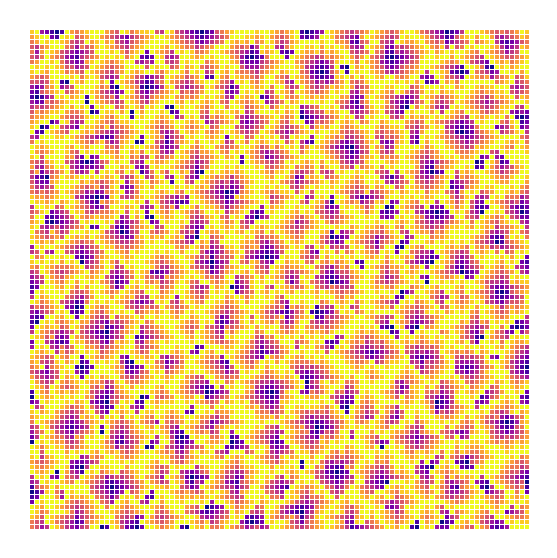

In [52]:
in9 = parse(9, lambda line: list(map(int, line)), show=0)

def show_heights(in9, low=None):
    plt.figure(figsize=(10, 10))
    C = [in9[point[0]][point[1]] for point in points(in9)]
    plt.scatter(*T(points(in9)), marker='s', s=10, c=C, cmap=plt.get_cmap('plasma'))
    if low: plt.plot(*T(get_lowest_points(in9)), low, markersize=4)
    plt.axis('square'); plt.axis('off')
    
show_heights(in9)

# Day 10

In [78]:
in10 = parse(10, show=0)

pairs = {')':'(', ']':'[', '}':'{', '>':'<'}
scores = {')':3, ']':57, '}':1197, '>':25137}

def get_score(chunk):
    stack = []
    for c in chunk:
        if c in [')', ']', '}', '>']:
            if not stack or stack[-1] != pairs[c]:
                return scores[c]
            else:
                stack.pop()
        else:
            stack.append(c)
    return 0

def syntax(chunks):
    return sum([get_score(chunk) for chunk in chunks])

answer(10.1, 436497, lambda: syntax(in10))

  .0010 seconds, answer: 436,497

In [98]:
in10 = parse(10, show=0)

pairs = {')':'(', '(':')', ']':'[', '[':']', '}':'{', '{':'}', '>':'<', '<':'>'}
scores = {')':1, ']':2, '}':3, '>':4}

def get_score(chunk):
    stack = []
    for c in chunk:
        if c in [')', ']', '}', '>']:
            if not stack or stack[-1] != pairs[c]:
                return 0
            else:
                stack.pop()
        else:
            stack.append(c)
    
    score = ''.join(stack[::-1]).translate(str.maketrans('([{<', '1234'))
    return int(score, base=5)

def syntax(chunks):
    scores = sorted([get_score(chunk) for chunk in chunks])
    scores = [s for s in scores if s > 0]
    return scores[len(scores)//2]

answer(10.2, 2377613374, lambda: syntax(in10))

  .0010 seconds, answer: 2,377,613,374

# Day 11

In [20]:
class Grid2(dict):

    def __init__(self, grid: List[str]):
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.update(
            {
                (int(x), int(y)): int(val)
                for y, row in enumerate(grid)
                for x, val in enumerate(row)
            }
        )

    def neighbors(self, p: Tuple):
        adjacent = [(p[0]+1, p[1]), (p[0], p[1]+1),  (p[0]+1, p[1]+1), (p[0]-1, p[1]), (p[0], p[1]-1), (p[0]-1, p[1]-1), (p[0]-1, p[1]+1), (p[0]+1, p[1]-1)]
        return [point for point in adjacent if point[0] >= 0 and point[1] >= 0 and point[0] < self.rows and point[1] < self.cols]

    def get(self, p: Tuple):
        return self[p]

    def print(self):
        for y in range(0, self.cols):
            print([self.get((x,y)) for x in range(0, self.cols)])
        print()


in11 = parse(11, show=0)

'''
 energy increases by 1
 octo with energy > 9 flashes
   increases all adjacent by 1
   any other ones also flash
   octo can only flash once per step
   any octo that flashed during this step has its energy set to 0
'''

def octo(octos, steps):
    grid = Grid2(octos)
    print("initial grid")
    grid.print()
    flashes = 0
    for step in range(0, steps):
        to_flash = []
        for octo in grid.keys():
            grid[octo] += 1
            if grid[octo] == 10:
                to_flash.append(octo)
        print("after increment")
        grid.print()
        flashed = set()
        while to_flash:
            flasher = to_flash.pop()
            if flasher not in flashed:
                print(f"flashing: {flasher}    to_flash: {to_flash}")
                grid[flasher] = 0
                for neighbor in grid.neighbors(flasher):
                    grid[neighbor] += 1
                    if grid[neighbor] == 10:
                        to_flash.append(neighbor)
                grid.print()
                flashed.add(flasher)

        for flash in flashed:
            grid[flash] = 0
        print("result")    
        grid.print()
        flashes += len(flashed)

    return flashes


answer(11.1, 1749, lambda: octo(in11, 100))

initial grid
[1, 3, 2, 6, 2, 5, 3, 3, 1, 5]
[3, 4, 2, 7, 7, 2, 8, 1, 1, 3]
[5, 7, 5, 1, 6, 1, 2, 5, 4, 2]
[6, 5, 4, 3, 8, 6, 8, 3, 2, 2]
[4, 4, 2, 2, 5, 2, 6, 2, 2, 1]
[2, 2, 3, 4, 3, 2, 5, 6, 4, 7]
[1, 7, 7, 3, 1, 7, 4, 8, 8, 7]
[7, 2, 8, 1, 3, 2, 1, 6, 7, 4]
[6, 5, 6, 2, 5, 1, 3, 1, 1, 8]
[4, 8, 2, 4, 5, 4, 1, 5, 2, 2]

after increment
[2, 4, 3, 7, 3, 6, 4, 4, 2, 6]
[4, 5, 3, 8, 8, 3, 9, 2, 2, 4]
[6, 8, 6, 2, 7, 2, 3, 6, 5, 3]
[7, 6, 5, 4, 9, 7, 9, 4, 3, 3]
[5, 5, 3, 3, 6, 3, 7, 3, 3, 2]
[3, 3, 4, 5, 4, 3, 6, 7, 5, 8]
[2, 8, 8, 4, 2, 8, 5, 9, 9, 8]
[8, 3, 9, 2, 4, 3, 2, 7, 8, 5]
[7, 6, 7, 3, 6, 2, 4, 2, 2, 9]
[5, 9, 3, 5, 6, 5, 2, 6, 3, 3]

result
[2, 4, 3, 7, 3, 6, 4, 4, 2, 6]
[4, 5, 3, 8, 8, 3, 9, 2, 2, 4]
[6, 8, 6, 2, 7, 2, 3, 6, 5, 3]
[7, 6, 5, 4, 9, 7, 9, 4, 3, 3]
[5, 5, 3, 3, 6, 3, 7, 3, 3, 2]
[3, 3, 4, 5, 4, 3, 6, 7, 5, 8]
[2, 8, 8, 4, 2, 8, 5, 9, 9, 8]
[8, 3, 9, 2, 4, 3, 2, 7, 8, 5]
[7, 6, 7, 3, 6, 2, 4, 2, 2, 9]
[5, 9, 3, 5, 6, 5, 2, 6, 3, 3]

after increment
[3, 5, 4, 8, 4,

 1.7658 seconds, answer: 1,749

In [43]:
class Grid2(dict):
    def __init__(self, grid: List[str]):
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.update(
            {
                (int(x), int(y)): int(val)
                for y, row in enumerate(grid)
                for x, val in enumerate(row)
            }
        )

    def neighbors(self, p: Tuple[int, int]):
        adjacent = [(p[0]+1, p[1]), (p[0], p[1]+1),  (p[0]+1, p[1]+1), (p[0]-1, p[1]), (p[0], p[1]-1), (p[0]-1, p[1]-1), (p[0]-1, p[1]+1), (p[0]+1, p[1]-1)]
        return [point for point in adjacent if point[0] >= 0 and point[1] >= 0 and point[0] < self.rows and point[1] < self.cols]

    def print(self):
        for y in range(0, self.cols):
            print([self.get((x,y)) for x in range(0, self.cols)])
        print()


in11 = parse(11, show=0)


def octo(octos, steps):
    grid = Grid2(octos)
    for step in range(1, steps+1):
        for octo in grid:
            grid[octo] += 1

        to_flash = [p for p in grid if grid[p] > 9]
        flashed = set()
        while to_flash:
            flasher = to_flash.pop()
            if flasher not in flashed:
                for neighbor in grid.neighbors(flasher):
                    grid[neighbor] += 1
                    if grid[neighbor] > 9:
                        to_flash.append(neighbor)
                flashed.add(flasher)

        for p in flashed:
            grid[p] = 0

        if len(flashed) == len(grid):
            grid.print()
            return step

answer(11.2, 285, lambda: octo(in11, 1000))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



  .0410 seconds, answer: 285

# Day 12

In [101]:
class Graph(dict):
    def __init__(self, edges):
        for edge in edges:
            s = edge.split('-')
            self.add_edge(s[0], s[1])
            self.add_edge(s[1], s[0])

    def add_edge(self, a, b):
        if a in self:
            self[a].append(b)
        else:
            self[a] = [b]

in12 = parse(12, show=0)

def find_routes(graph, route, routes):
    node = route[-1]
    if node == 'end':
        return routes.append(route)
        
    adjacent = graph[node]
    for adj in adjacent:
        if adj not in route or adj.lower() != adj:
            route.append(adj)
            find_routes(graph, route, routes)
            route.pop()

def cave(edges):
    graph = Graph(edges)
    route = ['start']
    routes = []
    find_routes(graph, route, routes)
    return len(routes)
    
answer(12.1, 5958, lambda: cave(in12))

  .0400 seconds, answer: 5,958

In [116]:
class Graph(dict):
    def __init__(self, edges):
        for edge in edges:
            s = edge.split('-')
            self.add_edge(s[0], s[1])
            self.add_edge(s[1], s[0])

    def add_edge(self, a, b):
        if a in self:
            self[a].append(b)
        else:
            self[a] = [b]

in12 = parse(12, show=0)

def find_routes(graph, route):
    if route[-1] == 'end':
        yield [route]
    else:
        for adj in graph[route[-1]]:
            if adj not in route or adj.lower() != adj:
                yield from find_routes(graph, route + [adj])

def cave(edges):
    return sum(1 for r in find_routes(Graph(edges), ['start']) if bool(r))
    
answer(12.1, 5958, lambda: cave(in12))

  .0456 seconds, answer: 5,958

In [99]:
class Graph(dict):
    def __init__(self, edges):
        for edge in edges:
            s = edge.split('-')
            self.add_edge(s[0], s[1])
            self.add_edge(s[1], s[0])

    def add_edge(self, a, b):
        if a in self:
            self[a].append(b)
        else:
            self[a] = [b]

in12 = parse(12, show=0)

def find_routes(graph, route, routes, two):
    node = route[-1]
    
    if node == 'end':
        routes[0] += 1
        return
        
    adjacent = graph[node]
    for adj in adjacent:
        if adj not in route or adj.isupper():
            route.append(adj)
            find_routes(graph, route, routes, two)
            route.pop()
        elif adj.islower() and adj != 'start' and adj != 'end' and not two:
            route.append(adj)
            two = True
            find_routes(graph, route, routes, two)
            two = False
            route.pop()

def cave(edges):
    graph = Graph(edges)
    route = ['start']
    routes = [0]
    find_routes(graph, route, routes, False)
    return routes[0]
    
answer(12.2, 150426, lambda: cave(in12))

 1.1862 seconds, answer: 150,426

In [129]:
class Graph(defaultdict):
    def __init__(self, edges):
        self.default_factory = list
        for key, val in edges:
            self[key].append(val)
            self[val].append(key)

in12 = parse(12, words, show=0)

def find_routes(graph, route, two):
    if route[-1] == 'end':
        yield [route]
    else:
        for adj in graph[route[-1]]:
            if adj not in route or adj.lower() != adj:
                yield from find_routes(graph, route + [adj], two)
            elif adj.islower() and adj != 'start' and not two:
                yield from find_routes(graph, route + [adj], two=True)
                two = False
def cave(edges):
    return sum(1 for r in find_routes(Graph(edges), ['start'], False))
    
answer(12.2, 150426, lambda: cave(in12))

 1.0257 seconds, answer: 150,426

# Day 13

In [143]:
in13 = parse(13, atoms, show=0)

def origami(input):
    grid = set()
    folds = []
    xmax = ymax = 0
    for p in input:
        if p and p[0] == 'fold':
            folds.append(p[2:4])
        elif p:
            if p[0] > xmax:
                xmax = p[0]
            if p[1] > ymax:
                ymax = p[1]
            grid.add(p)


    f = folds[0]
    line = f[1]

    if f[0] == 'x':
        for x,y in [(x,y) for x in range(0, line+1) for y in range(0, ymax+1)]:
            if ((line+x),y) in grid:
                if line+x == line:
                    print((x,y))
                newx = line-x
                grid.add((newx, y))
                grid.remove((line+x,y))

    return len(grid)

origami(in13)


729

In [133]:
in13 = parse(13, atoms, show=0)

def origami(input):
    folds = [f for f in input if len(f) > 2]
    dots = {item for item in input if len(item) == 2}

    for fold, along, x_or_y, line in folds[:1]:
        if x_or_y == 'x':
            return len({(line - abs(line-x),y) for x,y in dots})
        else:
            return len({(x, line - abs(line-y)) for x,y in dots})

answer(13.1, 729, lambda: origami(in13))


  .0000 seconds, answer: 729

###...##..####.#....###..#..#.####.###.
#..#.#..#....#.#....#..#.#..#.#....#..#
#..#.#......#..#....###..####.###..#..#
###..#.##..#...#....#..#.#..#.#....###.
#.#..#..#.#....#....#..#.#..#.#....#...
#..#..###.####.####.###..#..#.#....#...


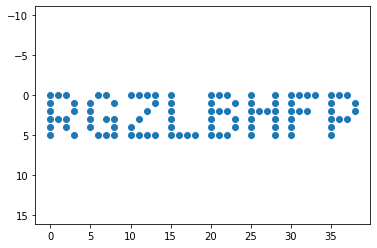

In [163]:
in13 = parse(13, atoms, show=0)

def origami(input):
    folds = [f for f in input if len(f) > 2]
    dots = {item for item in input if len(item) == 2}

    for fold, along, x_or_y, line in folds:
        if x_or_y == 'x':
            dots = {(line - abs(line-x),y) for x,y in dots}
        else:
            dots = {(x, line - abs(line-y)) for x,y in dots}

    xmax = ymax = 0
    for x,y in dots:
        if x > xmax:
            xmax = x
        if y > ymax:
            ymax = y

    for y in range(0, ymax+1):
        print(''.join(['#' if (x,y) in dots else '.' for x in range(0,xmax+1)]))

    plt.scatter(*T(dots), marker='o')
    plt.axis('equal'); 
    plt.gca().invert_yaxis()

#RGZLBHFP
origami(in13)


# Day 14

In [42]:
in14 = parse(14, show=0)

def polymer(input, steps):
    poly = input[0]
    template = {insert.split(' -> ')[0]:insert.split(' -> ')[1] for insert in input[2:]}

    for i in range(0, steps):
        insertions = deque()
        for i in range(0, len(poly)-1):
            p = ''.join(poly[i:i+2])
            if p in template:
                insertions.append((i, template[p]))

        newstr = ''
        insert = insertions.popleft()
        for i in range(0, len(poly)):
            newstr += (poly[i])
            if i == insert[0]:
                newstr += insert[1]
                if insertions:
                    insert = insertions.popleft()
        poly = newstr
    c = Counter(poly)
    return c.most_common(1)[0][1] - c.most_common()[-1][1]

answer(14.1, 2375, lambda: polymer(in14, 10))

Counter({'O': 3092, 'B': 3003, 'S': 2668, 'F': 2099, 'N': 2034, 'H': 1919, 'P': 1717, 'K': 1210, 'C': 998, 'V': 717})


  .0409 seconds, answer: 2,375

In [69]:
in14 = parse(14, words, show=0)

def pairs(poly):
    return [poly[i:i+2]for i in range(0, len(poly)-1)]

def polymer(input, steps):
    poly = input[0][0]
    template = dict(input[2:])

    for i in range(0, steps):
        poly = ''.join([p[0] + template[p] for p in pairs(poly)] + [poly[-1]])
    c = Counter(poly)
    return c.most_common(1)[0][1] - c.most_common()[-1][1]

answer(14.1, 2375, lambda: polymer(in14, 10))

  .0163 seconds, answer: 2,375

In [57]:
in14 = parse(14, show=0)

def polymer(input, steps):
    poly = input[0]
    template = {insert.split(' -> ')[0]:insert.split(' -> ')[1] for insert in input[2:]}

    pairs = defaultdict(int)
    for i in range(0, len(poly)-1):
        pairs[poly[i:i+2]] += 1
    for i in range(0, steps):
        pairs_to_add = defaultdict(int)
        for pair, val in pairs.items():
            if pair in template:
                a = pair[0] + template[pair]
                b = template[pair] + pair[1]
                pairs_to_add[a] += val
                pairs_to_add[b] += val

        pairs = pairs_to_add

    c = Counter()
    for pair, num in pairs.items():
        c[pair[0]] += num
    c[poly[-1]] += 1

    return c.most_common(1)[0][1] - c.most_common()[-1][1]

answer(14.2, 1976896901756, lambda: polymer(in14, 40))

  .0244 seconds, answer: 1,976,896,901,756

In [233]:
in14 = parse(14, words, show=0)

def pairz(poly):
    return [poly[i:i+2]for i in range(0, len(poly)-1)]

def polymer(input, steps):
    poly = input[0][0]
    template = dict(input[2:])

    pairs = Counter(pairz(poly))
    for i in range(0, steps):
        pairs_to_add = Counter()
        for pair, val in pairs.items():
            if pair in template:
                pairs_to_add[pair[0] + template[pair]] += val
                pairs_to_add[template[pair] + pair[1]] += val
        pairs = pairs_to_add

    c = Counter()
    for pair, num in pairs.items():
        c[pair[0]] += num
    c[poly[-1]] += 1

    return c.most_common(1)[0][1] - c.most_common()[-1][1]

answer(14.2, 1976896901756, lambda: polymer(in14, 40))

  .0040 seconds, answer: 1,976,896,901,756

# Day 15

In [75]:
in15 = parse(15, digits, show=0)

def get_min(cache, i, j, risk):
    if i-1 < 0 and j-1 < 0:
        return 0
    elif i-1 < 0:
        return risk + cache[(i, j-1)]
    elif j-1 < 0:
        return risk + cache[(i-1, j)]
    else:
        return risk + min(cache[(i-1,j)], cache[(i, j-1)])

def route(risks):
    cache = {}
    for i, row in enumerate(risks):
        for j, risk in enumerate(row):
            cache[(i,j)] = get_min(cache, i, j, risk)

    return cache[(len(risks)-1, len(risks[0])-1)]

answer(15.1, 592, lambda: route(in15))

  .0606 seconds, answer: 592

In [62]:
import heapq

in15 = Grid(parse(15, digits, show=0))

def add(risk, i):
    return (risk + i) - 9 if risk+i > 9 else risk+i

def expand_risks(grid, repeat=5):
    w = 100
    h = 100
    return Grid({(x + xr * w, y + yr * h): add(grid[x, y], xr + yr)
                 for xr in range(repeat) 
                 for yr in range(repeat)
                 for x, y in grid})
    
def heuristic(node):
    return 499 - node[0] + 499 - node[1]

def neighbors(node):
    x, y = node
    return [point for point in [(x-1, y), (x+1, y), (x, y-1), (x, y+1)] 
            if point[0] >= 0 and point[0] < 500 and point[1] >= 0 and point[1] < 500]
    
def route(grid):
    grid = expand_risks(grid)
    frontier = []
    heapq.heappush(frontier, (1, (0,0)))
    prev = dict()
    cost = {(0,0): 0}
    
    while frontier:
        p, current = heapq.heappop(frontier)
        for next in neighbors(current):
            new_cost = cost[current] + grid[next]
            if next not in cost or new_cost < cost[next]:
                cost[next] = new_cost
                priority = new_cost + heuristic(next)
                heapq.heappush(frontier, (priority, next))
                prev[next] = current
    return cost[(499,499)]

answer(15.2, 2897, lambda: route(in15))

 2.4838 seconds, answer: 2,897

# Day 16

In [219]:
in16, *b = parse(16, show=0)

# binary
# 0-2: packet version
# 3-5: type id

# packet with ID 4 represent literal value
#   - single binary number
#   - padded with leading zeroes until 
#   - its length is a multiple of 4 bits
#   - broken into groups of 4 bits
#   - each group prefixed by 1 except last group

# packet with ID other than 4 is operator
#   - contains 1 or more packets
#   - mode indicated by bit after header (length type ID)
#       - 0: next 15 bits are a number that represents 
#            total length in bits of the sub-packets
#       - 1: next 11 bits represent number or sub-packets
#

def get_header(input, i, pad): 
    header = (input[i:i+3], input[i+3:i+6], i+6)
    print(f'{pad}version: {header[0]}, type: {header[1]}')
    return header

def get_length(input, i, pad):
    if input[i] == '0':
        # total length in bits of sub-packets
        length = (0, int(input[i+1: i+1+15], 2), i+16)
        print(f"{pad}total number of bits: {length[1]}")
        return length
    else:
        # number of sub-packets
        length = (1, int(input[i+1: i+1+11], 2), i+12)
        print(f"{pad}number of packets: {length[1]}")
        return length
    

def get_payload(input, i, t, pad):
    if int(t, 2) == 4:
        print(f'{pad}literal')
        # get groups
        literal = ''
        while input[i] == '1':
            literal += input[i+1:i+5]
            i = i + 5
        literal += input[i+1:i+5]
        i = i + 5
        print(f'{pad}{int(literal, 2)}')
        return (i, 0)
        
    else:
        print(f'{pad}operator')
        mode, length, i = get_length(input, i, pad)
        if mode == 0:
            # decode for length of bits
            end = i + length
            start = i
            sum = 0
            while length - (i-start) > 0:
                print(f'{pad}BITS LEFT: {length-(i-start)}, {i}')
                i, version_sum = decode(input, i, pad)
                sum += version_sum
            print(f'{pad}PACKET COMPLETE')
            return (end, sum)
        elif mode == 1:
            # decode for number of packets
            sum = 0
            while length > 0:
                print(f'{pad}PACKETS LEFT: {length}, {i}')
                i, version_sum = decode(input, i, pad)
                sum += version_sum
                length -= 1
            print(f'{pad}PACKET COMPLETE: {length}')
            return (i, sum) 
        

def decode(input, i=0, pad=''):
    version, type, i = get_header(input, i, pad + '  ')
    i, version_sum = get_payload(input, i, type, pad + '  ')
    return (i, version_sum + int(version, 2))

def packets(input):
    test = f'{int(input, 16):b}'
    padded = ('0' * (len(input)*4-len(test)))  + test
    return decode(padded)[1]

#answer(16.1, 12, lambda: packets('620080001611562C8802118E34'))
#answer(16.1, 16, lambda: packets('8A004A801A8002F478'))
#answer(16.1, 23, lambda: packets('C0015000016115A2E0802F182340'))
#answer(16.1, 31, lambda: packets('A0016C880162017C3686B18A3D4780'))
answer(16.1, 901, lambda: packets(in16))

  version: 000, type: 000
  operator
  number of packets: 53
  PACKETS LEFT: 53, 18
    version: 111, type: 000
    operator
    number of packets: 4
    PACKETS LEFT: 4, 36
      version: 110, type: 100
      literal
      208850619
    PACKETS LEFT: 3, 77
      version: 011, type: 100
      literal
      57
    PACKETS LEFT: 2, 93
      version: 101, type: 100
      literal
      515
    PACKETS LEFT: 1, 114
      version: 001, type: 100
      literal
      977
    PACKET COMPLETE: 0
  PACKETS LEFT: 52, 135
    version: 100, type: 001
    operator
    total number of bits: 80
    BITS LEFT: 80, 157
      version: 110, type: 100
      literal
      95
    BITS LEFT: 64, 173
      version: 101, type: 100
      literal
      252
    BITS LEFT: 48, 189
      version: 000, type: 100
      literal
      38
    BITS LEFT: 32, 205
      version: 101, type: 100
      literal
      44
    BITS LEFT: 16, 221
      version: 001, type: 100
      literal
      214
    PACKET COMPLETE
  PACKETS LEF

  .0104 seconds, answer: 901

In [265]:
in16, *b = parse(16, show=0)

def get_header(input, i, pad): 
    header = (int(input[i:i+3], 2), int(input[i+3:i+6], 2), i+6)
    print(f'{pad}version: {header[0]}, type: {header[1]}')
    return header

def get_length(input, i, pad):
    if input[i] == '0':
        length = (0, int(input[i+1: i+1+15], 2), i+16)
        print(f"{pad}total number of bits: {length[1]}")
        return length
    else:
        length = (1, int(input[i+1: i+1+11], 2), i+12)
        print(f"{pad}number of packets: {length[1]}")
        return length

def get_payload(input, i, op, pad):
    if op == 4:
        print(f'{pad}literal')
        # get groups
        literal = ''
        while input[i] == '1':
            literal += input[i+1:i+5]
            i = i + 5
        literal += input[i+1:i+5]
        i = i + 5
        print(f'{pad}{int(literal, 2)}')
        return (i, [int(literal, 2)])

    else:
        print(f'{pad}operator')
        mode, length, i = get_length(input, i, pad)
        operands = []
        if mode == 0:
            # decode for length of bits
            start = i
            while length - (i-start) > 0:
                print(f'{pad}BITS LEFT: {length-(i-start)}, {i}')
                i, ops = decode(input, i, pad)
                operands += ops
            print(f'{pad}PACKET COMPLETE')
        elif mode == 1:
            # decode for number of packets
            while length > 0:
                print(f'{pad}PACKETS LEFT: {length}, {i}')
                i, ops = decode(input, i, pad)
                operands += ops
                length -= 1
            print(f'{pad}PACKET COMPLETE: {length}')
        return (i, [calculate(op, operands, pad)])

    # 0: sum
    # 1: product
    # 2: minmum
    # 3: maximum
    # 5: greater than
    # 6: less than
    # 7: equal to
def calculate(op, operands, pad):
    if op == 0:
        print(f'{pad}SUMMING {operands}')
        return sum(operands)
    elif op == 1:
        print(f'{pad}MULTIPLYING {operands}')
        return functools.reduce(operator.mul, operands)
    elif op == 2:
        print(f'{pad}MIN {operands}')
        return min(operands) 
    elif op == 3:
        print(f'{pad}MAX {operands}')
        return max(operands) 
    elif op == 5:
        print(f'{pad}GREATER THAN {operands}')
        return 1 if operands[0] > operands[1] else 0
    elif op == 6:
        print(f'{pad}LESS THAN {operands}')
        return 1 if operands[0] < operands[1] else 0
    elif op == 7:
        print(f'{pad}EQUAL TO {operands}')
        return 1 if operands[0] == operands[1] else 0

def decode(input, i=0, pad=''):
    version, type, i = get_header(input, i, pad + '  ')
    i, result = get_payload(input, i, type, pad + '  ')
    return (i, result)

def packets(input):
    test = f'{int(input, 16):b}'
    padded = ('0' * (len(input)*4-len(test))) + test
    result =  decode(padded)[1]
    print(result[0])
    return result[0]

#assert packets('C200B40A82') == 3
#assert packets('04005AC33890') == 54 
#assert packets('880086C3E88112') == 7
#assert packets('CE00C43D881120') == 9
#assert packets('D8005AC2A8F0') == 1
#assert packets('F600BC2D8F') == 0
#assert packets('9C005AC2F8F0') == 0
#assert packets('9C0141080250320F1802104A08') == 1
answer(16.2, 110434737925, lambda: packets(in16))

  version: 0, type: 0
  operator
  number of packets: 53
  PACKETS LEFT: 53, 18
    version: 7, type: 0
    operator
    number of packets: 4
    PACKETS LEFT: 4, 36
      version: 6, type: 4
      literal
      208850619
    PACKETS LEFT: 3, 77
      version: 3, type: 4
      literal
      57
    PACKETS LEFT: 2, 93
      version: 5, type: 4
      literal
      515
    PACKETS LEFT: 1, 114
      version: 1, type: 4
      literal
      977
    PACKET COMPLETE: 0
    SUMMING [208850619, 57, 515, 977]
  PACKETS LEFT: 52, 135
    version: 4, type: 1
    operator
    total number of bits: 80
    BITS LEFT: 80, 157
      version: 6, type: 4
      literal
      95
    BITS LEFT: 64, 173
      version: 5, type: 4
      literal
      252
    BITS LEFT: 48, 189
      version: 0, type: 4
      literal
      38
    BITS LEFT: 32, 205
      version: 5, type: 4
      literal
      44
    BITS LEFT: 16, 221
      version: 1, type: 4
      literal
      214
    PACKET COMPLETE
    MULTIPLYING [95, 25

  .0317 seconds, answer: 110,434,737,925

In [306]:
in16, *b = parse(16, show=0)

def int2(bin):
    return int(bin, 2)

Header = namedtuple('Header', 'version, type')
def get_header(bits, pad): 
    header = Header(int2(bits[:3]), int2(bits[3:6]))
    print(f'{pad}version: {header.version}, type: {header.type}')
    return (header, bits[6:])

def get_length(bits, pad):
    if bits[0] == '0':
        length = (0, int2(bits[1: 1+15]), bits[16:])
        print(f"{pad}total number of bits: {length[1]}")
        return length
    else:
        length = (1, int2(bits[1: 1+11]), bits[12:])
        print(f"{pad}number of packets: {length[1]}")
        return length

def get_payload(bits, op, pad):
    if op == 4:
        print(f'{pad}literal')
        # get groups
        literal = ''
        while True:
            prefix, group, bits = bits[0], bits[1:5], bits[5:]
            literal += group
            if prefix == '0':
                print(f'{pad}{int2(literal)}')
                return ([int2(literal)], bits)

    else:
        print(f'{pad}operator')
        mode, length, bits = get_length(bits, pad)
        operands = []
        if mode == 0:
            subpacket_bits, bits = bits[:length], bits[length:]
            while subpacket_bits:
                print(f'{pad}BITS LEFT: {len(subpacket_bits)}')
                ops, subpacket_bits = decode(subpacket_bits, pad)
                operands += (ops)
            print(f'{pad}PACKET COMPLETE')
        elif mode == 1:
            for p in range(0, length):
                print(f'{pad}PACKETS LEFT: {length-p}')
                ops, bits = decode(bits, pad)
                operands += ops
            print(f'{pad}PACKET COMPLETE')

        ops = {0: sum, 1: math.prod, 2: min, 3: max,
                5: lambda x: int(x[0] > x[1]), 
                6: lambda x: int(x[0] < x[1]), 
                7: lambda x: int(x[0] == x[1])}

        print(f'{pad}{operands}')
        return ([ops[op](operands)], bits)

def decode(bits, pad=''):
    header, bits = get_header(bits, pad + '  ')
    return get_payload(bits, header.type, pad + '  ')

def packets(input):
    padded = cat(f'{int(x, 16):04b}' for x in input)
    result =  decode(padded)[0][0]
    print(result)
    return result

import math
assert 110434737925 == packets(in16)
answer(16.2, 110434737925, lambda: packets(in16))

  version: 0, type: 0
  operator
  number of packets: 53
  PACKETS LEFT: 53
    version: 7, type: 0
    operator
    number of packets: 4
    PACKETS LEFT: 4
      version: 6, type: 4
      literal
      208850619
    PACKETS LEFT: 3
      version: 3, type: 4
      literal
      57
    PACKETS LEFT: 2
      version: 5, type: 4
      literal
      515
    PACKETS LEFT: 1
      version: 1, type: 4
      literal
      977
    PACKET COMPLETE
    [208850619, 57, 515, 977]
  PACKETS LEFT: 52
    version: 4, type: 1
    operator
    total number of bits: 80
    BITS LEFT: 80
      version: 6, type: 4
      literal
      95
    BITS LEFT: 64
      version: 5, type: 4
      literal
      252
    BITS LEFT: 48
      version: 0, type: 4
      literal
      38
    BITS LEFT: 32
      version: 5, type: 4
      literal
      44
    BITS LEFT: 16
      version: 1, type: 4
      literal
      214
    PACKET COMPLETE
    [95, 252, 38, 44, 214]
  PACKETS LEFT: 51
    version: 2, type: 1
    operator
  

  .0166 seconds, answer: 110,434,737,925

In [298]:
Packet = namedtuple("Packet", "type, version")
p = Packet(1,2)
p.type

1